# Exploratory Data Analysis and Decision Tree Implementation

In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Purpose of the Notebook
This notebook demonstrates Exploratory Data Analysis (EDA) and the implementation of a Decision Tree model.
The dataset contains information about rolling stock, including operational metrics, customer details, and product types.

We will perform the following:
1. Conduct detailed EDA to understand the dataset.
2. Build a Decision Tree model to predict a target variable based on the features.


In [ ]:

# Load the dataset
data = pd.read_csv("Rolling_Stock_Dataset_Large.csv")

# Display the first few rows
data.head()


,Order_ID,Date_of_Order,Customer_Name,Customer_Country,Product_Type,Product_Model,Quantity,Unit_Price,Delivery_Date,Production_Facility,...,Max_Speed_kmh,Passenger_Capacity,Fuel_Type,Total_Mileage_km,Years_in_Service,Last_Maintenance_Date,Next_Maintenance_Due,Reliability_Score,Profitability_Margin,Total_Price
0,ORD00001,2022-09-03,Customer_1,USA,Freight Wagon,Model A,16,58324.08,2022-11-16,Facility 2,...,229,811,Hybrid,383083.28,5,2022-08-14,2023-02-10,0.72,24.84,933185.28
1,ORD00002,2020-11-19,Customer_2,Germany,Locomotive,Model C,15,88128.90,2021-01-23,Facility 1,...,144,177,Diesel,486863.36,16,2021-10-19,2022-04-17,0.78,15.20,1321933.50
2,ORD00003,2020-03-02,Customer_3,China,Locomotive,Model A,17,72188.65,2020-05-06,Facility 2,...,217,294,Hybrid,306437.82,13,2020-10-02,2021-03-31,0.94,28.74,1227207.05
3,ORD00004,2020-10-27,Customer_4,Brazil,Passenger Coach,Model A,13,64663.98,2020-12-12,Facility 2,...,231,397,Electric,303934.71,5,2020-07-11,2021-01-07,0.57,13.44,840631.74
4,ORD00005,2022-01-18,Customer_5,Germany,Locomotive,Model C,1,71112.24,2022-04-25,Facility 1,...,241,869,Electric,293563.35,6,2022-12-26,2023-06-24,0.66,22.85,71112.24



## Exploratory Data Analysis (EDA)
EDA helps us understand the structure, quality, and underlying patterns in the dataset. We will:
1. Display the first few rows of the dataset.
2. Examine the data types and check for missing values.
3. Generate summary statistics.
4. Visualize important features to identify patterns and relationships.


In [ ]:

# Display basic information about the dataset
data.info()

# Display summary statistics
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65789 entries, 0 to 65788
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_ID                     65789 non-null  object 
 1   Date_of_Order                65789 non-null  object 
 2   Customer_Name                65789 non-null  object 
 3   Customer_Country             65789 non-null  object 
 4   Product_Type                 65789 non-null  object 
 5   Product_Model                65789 non-null  object 
 6   Quantity                     65789 non-null  int64  
 7   Unit_Price                   65789 non-null  float64
 8   Delivery_Date                65789 non-null  object 
 9   Production_Facility          65789 non-null  object 
 10  Lead_Time_Days               65789 non-null  int64  
 11  On_Time_Delivery             65789 non-null  bool   
 12  Customer_Satisfaction_Score  65789 non-null  int64  
 13  Warranty_Period_

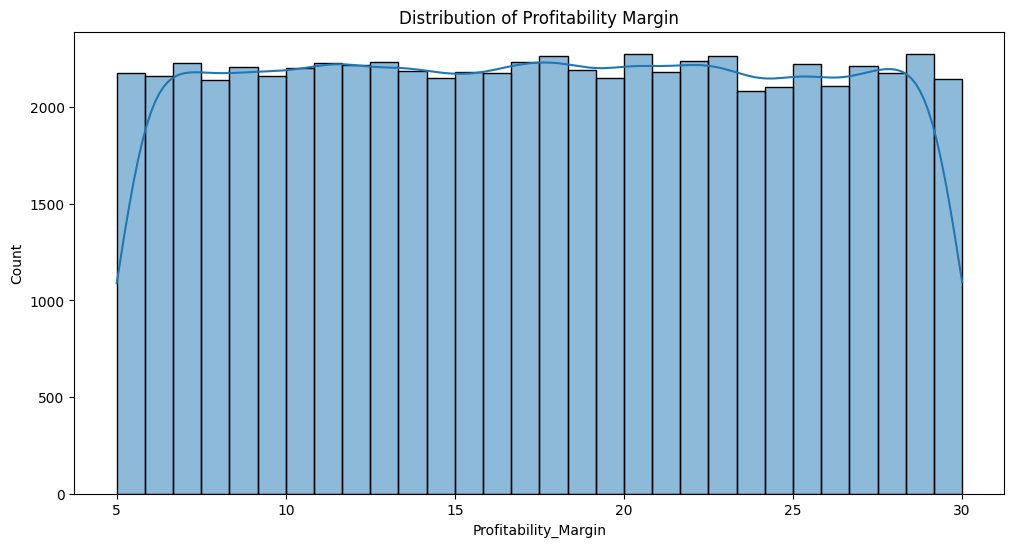

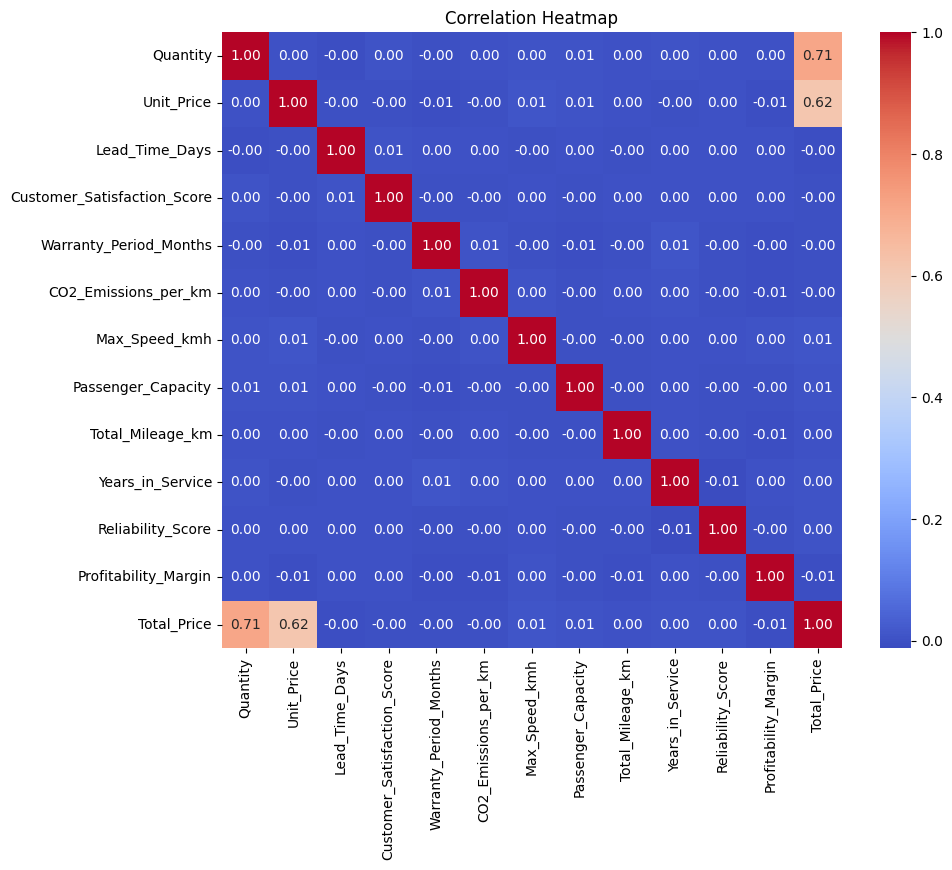

In [ ]:
# Visualize data distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['Profitability_Margin'], bins=30, kde=True)
plt.title("Distribution of Profitability Margin")
plt.show()

# Correlation heatmap (using only numeric columns)
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



## Data Preparation for Decision Tree Model
1. Identify the target variable and features.
2. Handle missing values or categorical data if necessary.
3. Split the data into training and testing sets.


In [ ]:

# Select features and target variable
features = ['Quantity', 'Unit_Price', 'Max_Speed_kmh', 'Passenger_Capacity', 'Total_Mileage_km']
target = 'Product_Type'

# Encode target variable (if necessary)
data['Product_Type'] = data['Product_Type'].astype('category').cat.codes

# Split the dataset
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Decision Tree Model Implementation
We will build and train a Decision Tree model, make predictions on the test set, and evaluate its performance.


In [ ]:

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3349039874347672
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.34      0.34      6645
           1       0.33      0.33      0.33      6477
           2       0.34      0.33      0.33      6615

    accuracy                           0.33     19737
   macro avg       0.33      0.33      0.33     19737
weighted avg       0.33      0.33      0.33     19737

Confusion Matrix:
 [[2275 2215 2155]
 [2176 2160 2141]
 [2210 2230 2175]]


In [ ]:
pip install squarify


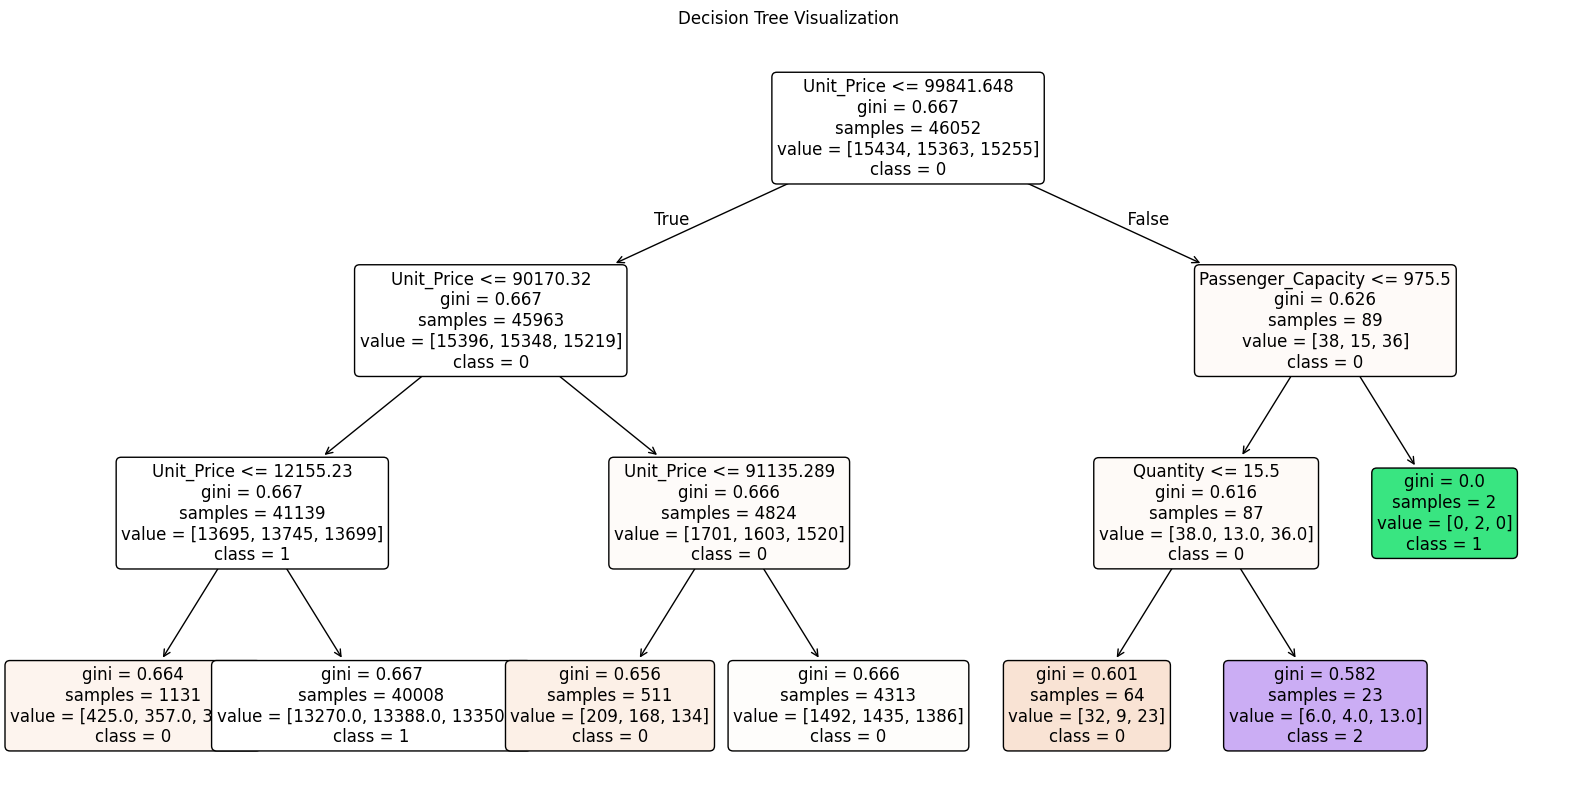

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree model (ensure X_train and y_train are defined)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Adjust max_depth for simplicity
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in dt_model.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()



## Summary and Findings
1. The EDA highlighted key features and relationships in the dataset.
2. The Decision Tree model was implemented and evaluated successfully, showing its performance in classifying the target variable.


The visualized decision tree graph provides insights into how the Decision Tree classifier splits data at each level to predict the target variable. Here’s a detailed explanation of how to interpret it:

---

### **Key Components of the Tree**

1. **Root Node**:
   - The topmost node in the tree (first split). It represents the entire dataset.
   - In the example, the root node splits on the feature `Unit_Price <= 99841.648`.
   - This split divides the dataset into two branches: **True** (left) and **False** (right).

2. **Nodes**:
   - Each box in the tree represents a decision node.
   - The information displayed in each node:
     - **Feature and Threshold**:
       - The feature used for splitting and the threshold value (e.g., `Unit_Price <= 90170.32`).
     - **Gini Index**:
       - Measures the impurity of the node. Lower values indicate purer nodes (closer to all samples in one class).
     - **Samples**:
       - The number of data points (rows) in the node.
     - **Value**:
       - The number of samples belonging to each class (e.g., `[15396, 15348, 15219]` indicates three classes with respective sample counts).
     - **Class**:
       - The majority class in the node.

3. **Leaves**:
   - The terminal nodes of the tree.
   - These represent the final decision for a particular subset of data.
   - No further splits occur at the leaf nodes.

---

### **How to Read the Tree**

1. **Start from the Root Node**:
   - Check the condition (`Unit_Price <= 99841.648`).
   - Follow the **True** (left) or **False** (right) branch based on the condition.

2. **Traverse Through Nodes**:
   - For each subsequent node, evaluate the splitting condition.
   - Continue until you reach a **leaf node**.

3. **Leaf Nodes**:
   - The leaf node provides the predicted class for the subset of data that satisfies the conditions along the path.

---

### **Insights from the Tree**

1. **Root Split**:
   - The first split (`Unit_Price <= 99841.648`) suggests that `Unit_Price` is the most important feature in determining the target class.

2. **Branching**:
   - For `Unit_Price <= 99841.648` (True branch), the data is split further using thresholds like `Unit_Price <= 90170.32` or `Passenger_Capacity <= 975.5`.

3. **Purity (Gini Index)**:
   - Lower Gini values in the leaf nodes indicate that the data points in those nodes mostly belong to a single class.
   - For example, the leaf node on the far right (`gini = 0.0`) indicates perfect purity, meaning all samples belong to the same class.

4. **Sample Distribution**:
   - Each node shows how many samples are present and how they are distributed among classes.

5. **Class Predictions**:
   - The `class` field in each node indicates the majority class label predicted for that node.

---

### Example Path
1. Start at the root node:
   - If `Unit_Price <= 99841.648` is **True**, go left.
2. Next, check `Unit_Price <= 90170.32`:
   - If **True**, go further left.
3. Continue until you reach a leaf node, such as `gini = 0.582`.

---

### Use Cases
This visualization helps in:
1. **Understanding Feature Importance**:
   - Features closer to the root are more important for the predictions.
2. **Debugging the Model**:
   - Identify how decisions are made at each step.
3. **Interpreting Predictions**:
   - Explain individual predictions by following the conditions in the tree.
